In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.basemap import Basemap
import numpy as np

In [35]:
df = pd.read_csv("surface_n2o_compilation.csv")
df.head()

,cruise,date,year,month,day,latitude,longitude,depth,n2o_ppb,n2o_nM,dn2o_ppb,atmPressure,temperature,salinity
0,JOINT II Leg 0,1976-03-08,1976,3,8,22.020,250.92,0.0,524.622831,11.59,224.739949,1.001743,21.9,34.664284
1,JOINT II Leg 0,1976-03-10,1976,3,10,15.615,256.82,0.0,365.587598,6.82,65.701757,0.999566,27.7,33.795834
2,JOINT II Leg 0,1976-03-12,1976,3,12,9.540,262.56,0.0,435.085126,8.41,135.196326,0.998316,26.4,33.940033
3,JOINT II Leg 0,1976-03-13,1976,3,13,5.150,266.62,0.0,462.589867,8.29,162.699587,0.997575,29.2,32.883614
4,JOINT II Leg 0,1976-03-16,1976,3,16,-3.220,274.76,0.0,431.508109,8.07,131.613389,0.997930,27.4,34.689255


In [12]:
df["date"] = pd.to_datetime(df["date"], errors="coerce")
df = df.dropna(subset=["date"])
df_sorted = df.sort_values("date")

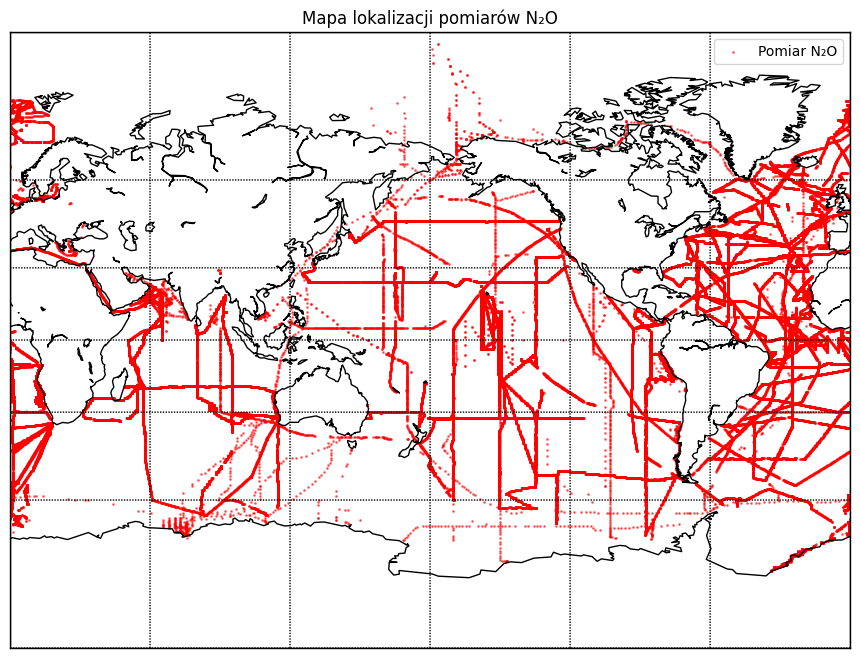

In [5]:
plt.figure(figsize=(14, 8))
m = Basemap(projection='mill', lon_0=180)
m.drawcoastlines()
m.drawmapboundary()
m.drawparallels(range(-90, 91, 30))
m.drawmeridians(range(0, 361, 60))
x, y = m(df["longitude"].values, df["latitude"].values)
m.scatter(x, y, s=1, c='red', alpha=0.5, label='Pomiar N₂O')

plt.title("Mapa lokalizacji pomiarów N₂O")
plt.legend()
plt.show()

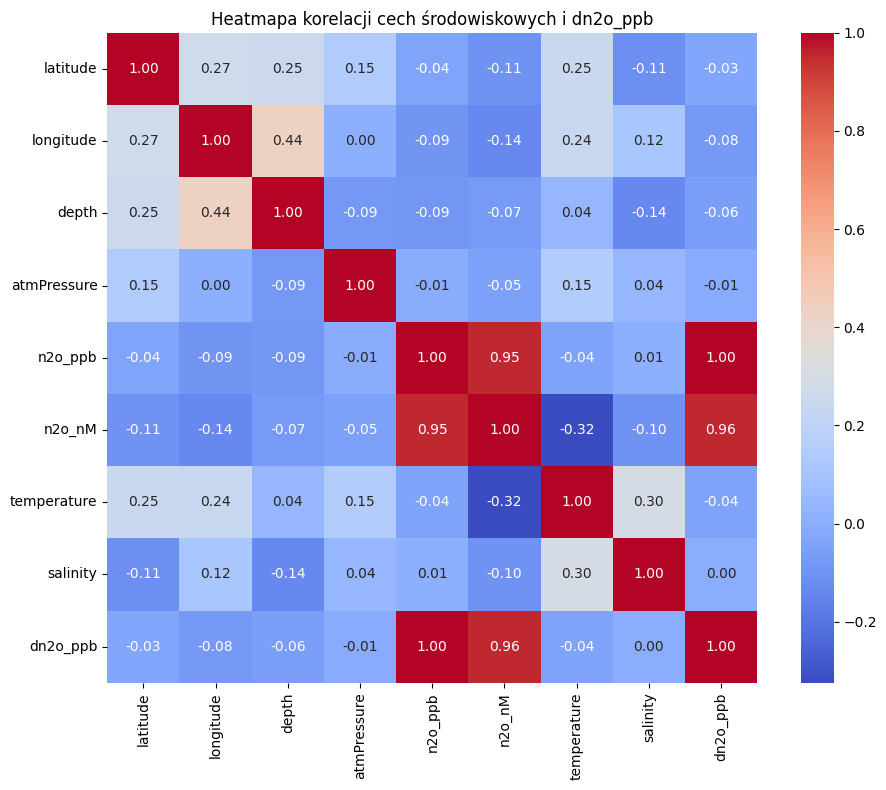

In [36]:
features = ["latitude", "longitude", "depth", "atmPressure", "n2o_ppb", "n2o_nM", "temperature", "salinity", "dn2o_ppb"]
corr = df[features].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Heatmapa korelacji cech środowiskowych i dn2o_ppb")
plt.tight_layout()
plt.show()

C:\Users\dosti\AppData\Local\Temp\ipykernel_6352\820400087.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df.set_index("date").resample("M")["dn2o_ppb"].mean().plot()


<Axes: xlabel='date'>

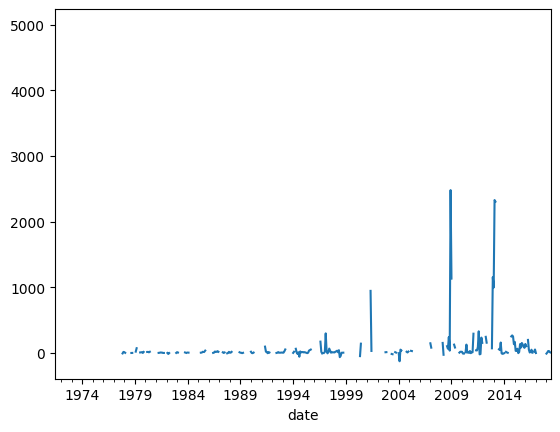

In [7]:
df.set_index("date").resample("M")["dn2o_ppb"].mean().plot()

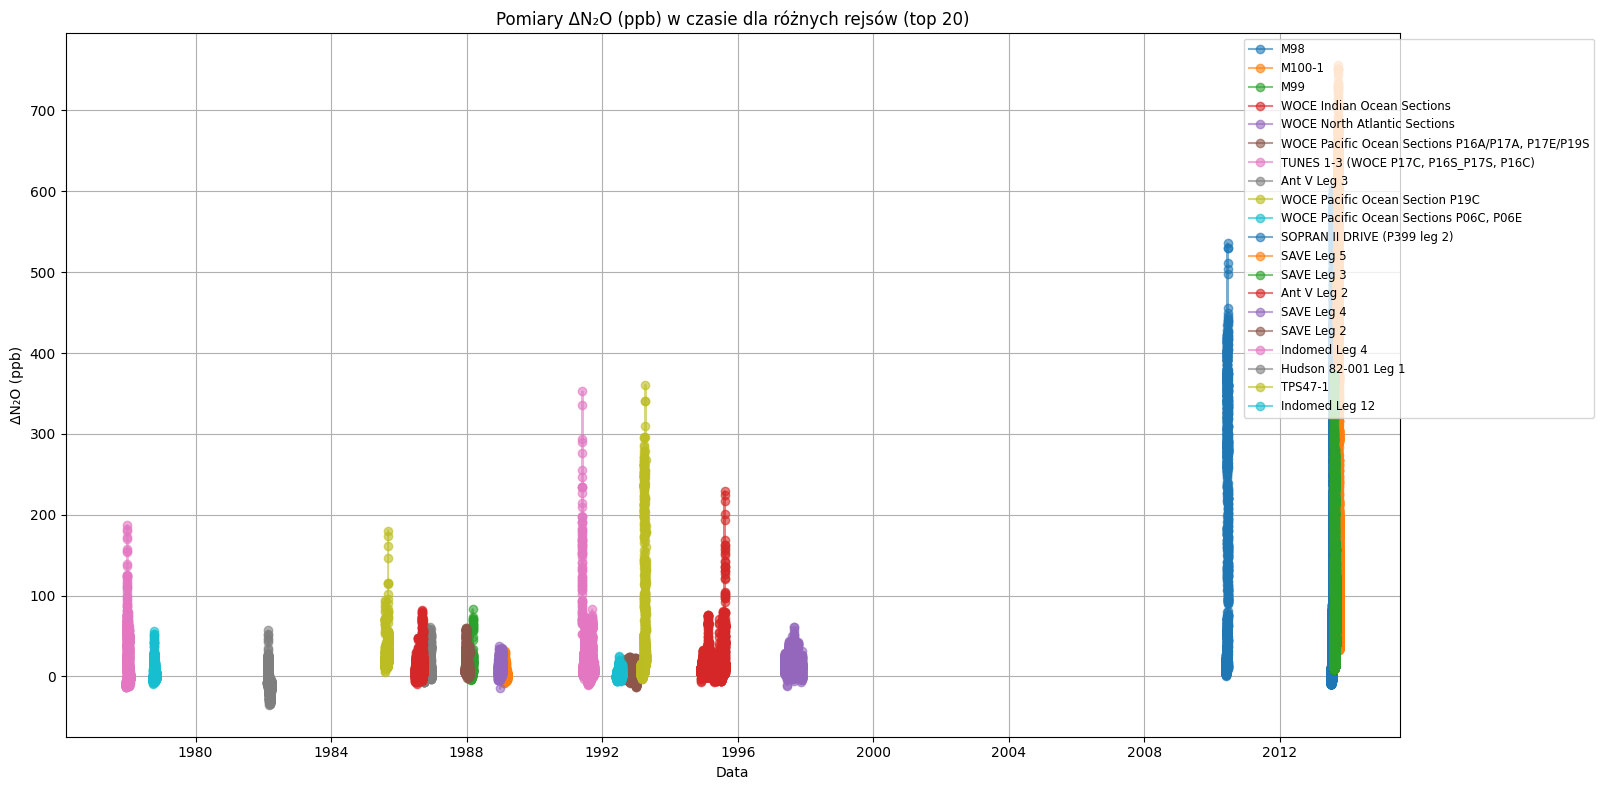

In [16]:
num_cruises = df["cruise"].nunique()
top_cruises = df["cruise"].value_counts().head(20).index.tolist()
plt.figure(figsize=(16, 8))

for cruise in top_cruises:
    cruise_data = df[df["cruise"] == cruise].sort_values("date")
    plt.plot(cruise_data["date"], cruise_data["dn2o_ppb"], marker='o', linestyle='-', alpha=0.6, label=cruise)

plt.xlabel("Data")
plt.ylabel("ΔN₂O (ppb)")
plt.title("Pomiary ΔN₂O (ppb) w czasie dla różnych rejsów (top 20)")
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1), fontsize='small')
plt.grid(True)
plt.tight_layout()
plt.show()

d:\Coding\Venvs\DataScience\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\Coding\Venvs\DataScience\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\Coding\Venvs\DataScience\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\Coding\Venvs\DataScience\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN befo

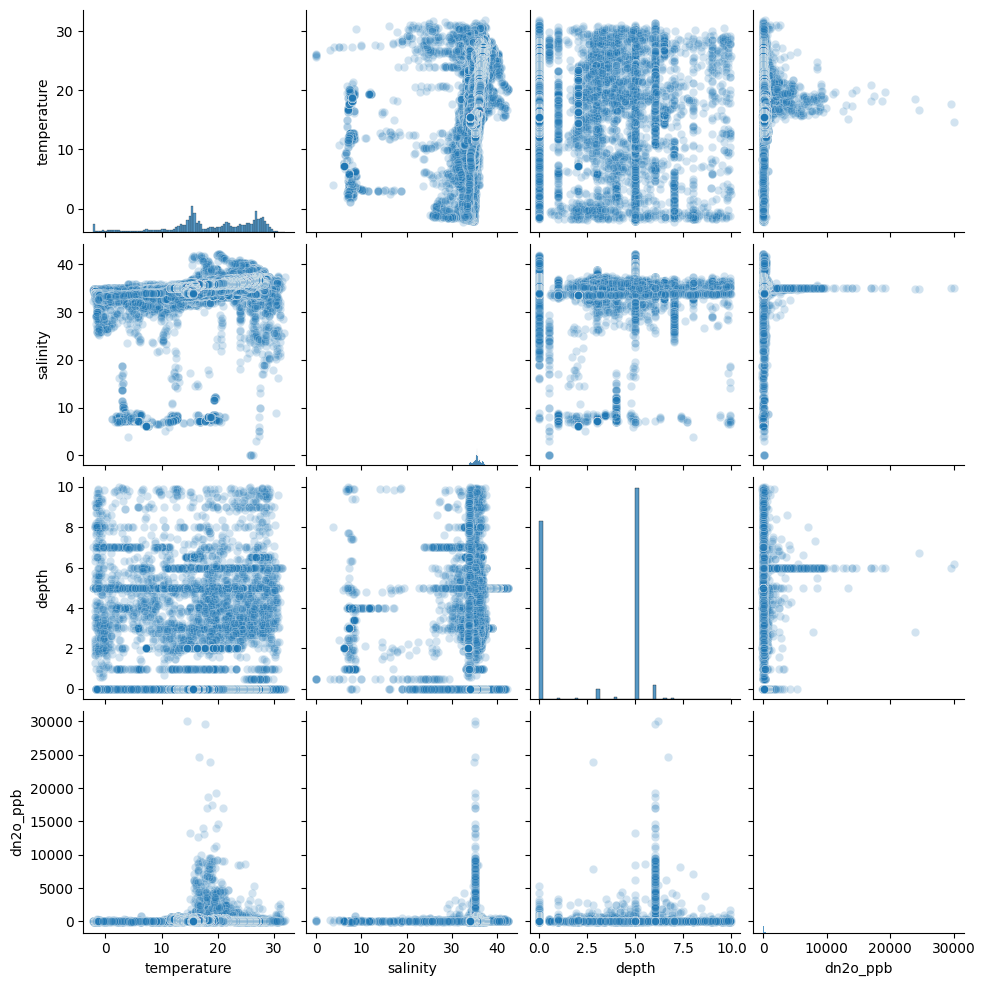

In [32]:
sns.pairplot(df[["temperature", "salinity", "depth", "dn2o_ppb"]], kind="scatter", plot_kws={"alpha":0.2})

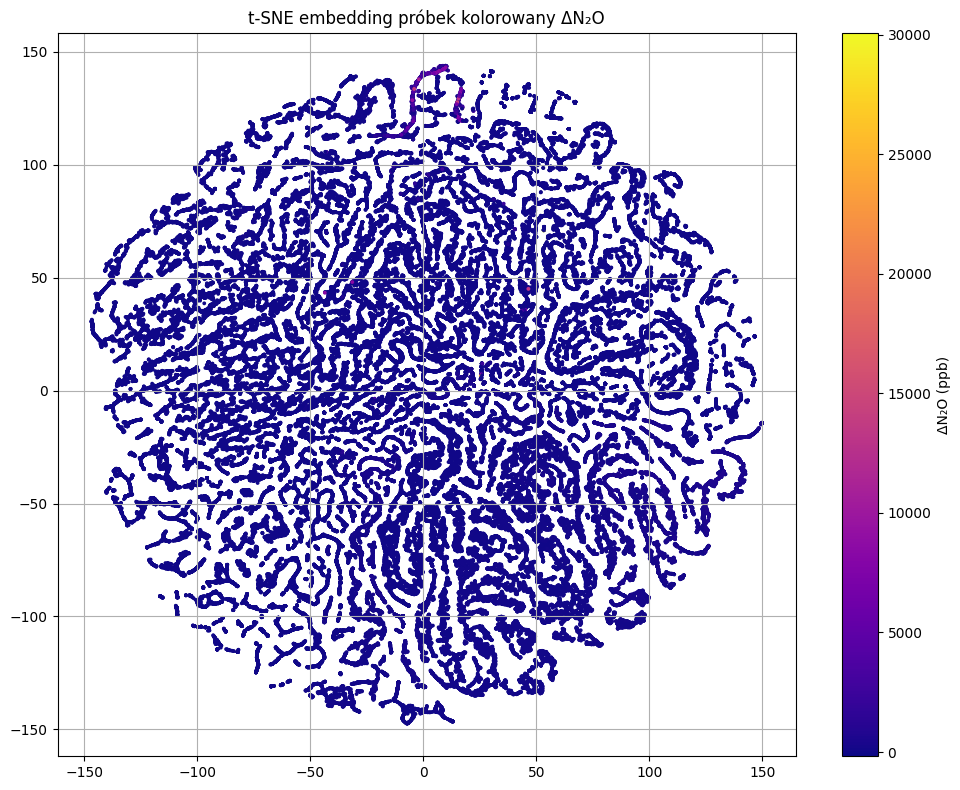

In [34]:
from sklearn.manifold import TSNE
X = df[["temperature", "salinity", "depth", "atmPressure"]]
y = df["dn2o_ppb"]

mask = X.notnull().all(axis=1) & y.notnull()
X_clean = X[mask]
y_clean = y[mask]

X_embedded = TSNE(n_components=2, perplexity=30, random_state=42).fit_transform(X_clean)

plt.figure(figsize=(10, 8))
plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=y_clean, cmap="plasma", s=3)
plt.colorbar(label="ΔN₂O (ppb)")
plt.title("t-SNE embedding próbek kolorowany ΔN₂O")
plt.grid(True)
plt.tight_layout()
plt.show()
